<a href="https://colab.research.google.com/github/Engr-Genius/DATA-ANALYSIS-WITH-PYTHON/blob/main/Data_Visualization_in_Python_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:

df = pd.read_csv("/content/drive/MyDrive/heart_attack_south_africa.csv")
# or your heart disease dataset
sns.set_style("whitegrid")

df.head()

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,1,76,Female,156,94,79,No,High,Sedentary,35.2,No,No,Good,High,No,No,264,141,65,0
1,2,39,Female,160,185,88,No,Low,Sedentary,21.3,No,No,Average,Medium,No,Yes,150,81,42,0
2,3,85,Male,254,173,113,Yes,Moderate,Highly Active,32.0,Yes,No,Good,Low,No,No,220,124,70,1
3,4,45,Female,261,187,65,No,High,Sedentary,36.4,No,Yes,Average,Low,No,Yes,141,56,38,1
4,5,48,Male,206,189,84,No,Low,Active,26.6,No,No,Good,High,No,No,221,186,26,0


Advanced Cholesterol Distribution Plot

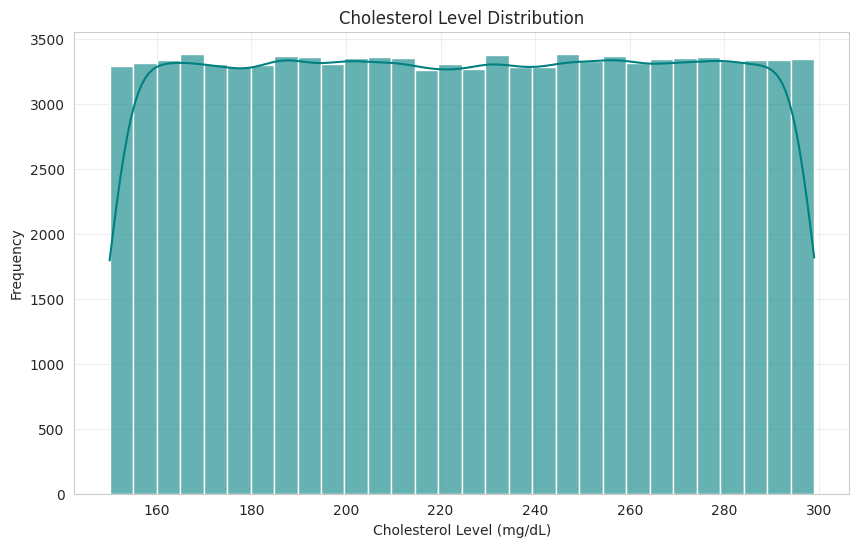

In [16]:
# Histogram + KDE Curve

plt.figure(figsize=(10, 6))

sns.histplot(
    df["Cholesterol_Level"],
    kde=True,
    bins=30,
    color="teal",
    alpha=0.6
)

plt.title("Cholesterol Level Distribution")
plt.xlabel("Cholesterol Level (mg/dL)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)

plt.show()

Overlay Scatter Plot + Line Plot (Age vs Cholesterol)

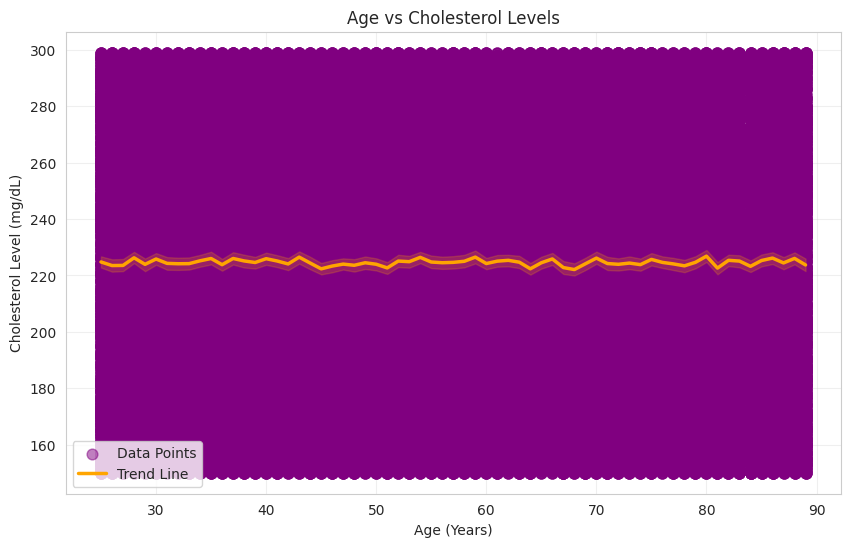

In [17]:

plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(
    df["Age"], df["Cholesterol_Level"],
    alpha=0.5, s=60, color="purple", label="Data Points"
)

# Line plot (trend)
sns.lineplot(
    x="Age",
    y="Cholesterol_Level",
    data=df,
    color="orange",
    linewidth=2.5,
    label="Trend Line"
)

plt.title("Age vs Cholesterol Levels")
plt.xlabel("Age (Years)")
plt.ylabel("Cholesterol Level (mg/dL)")
plt.legend()
plt.grid(alpha=0.3)

plt.show()

Multi-Axes Plot (Subplots)

✔ Bar chart: Cholesterol by Gender

✔ Scatter plot: Blood Pressure vs Age

/tmp/ipython-input-3207156466.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-3207156466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


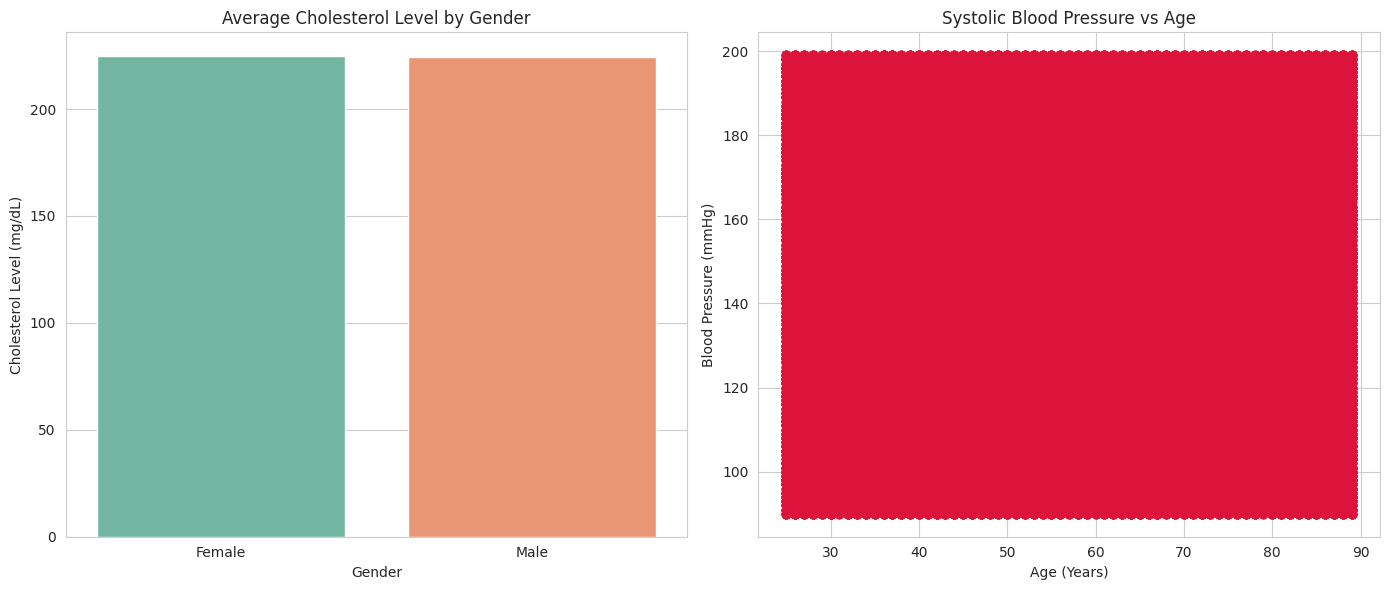

In [18]:

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# ----- Bar Chart: Cholesterol by Gender -----
sns.barplot(
    ax=ax[0],
    data=df,
    x="Gender",
    y="Cholesterol_Level",
    ci=None,
    palette="Set2"
)
ax[0].set_title("Average Cholesterol Level by Gender")
ax[0].set_xlabel("Gender")
ax[0].set_ylabel("Cholesterol Level (mg/dL)")

# ----- Scatter Plot: Blood Pressure vs Age -----
ax[1].scatter(
    df["Age"],
    df["Blood_Pressure_Systolic"],
    alpha=0.6,
    color="crimson"
)
ax[1].set_title("Systolic Blood Pressure vs Age")
ax[1].set_xlabel("Age (Years)")
ax[1].set_ylabel("Blood Pressure (mmHg)")

plt.tight_layout()
plt.show()

FacetGrid + Matplotlib Customization

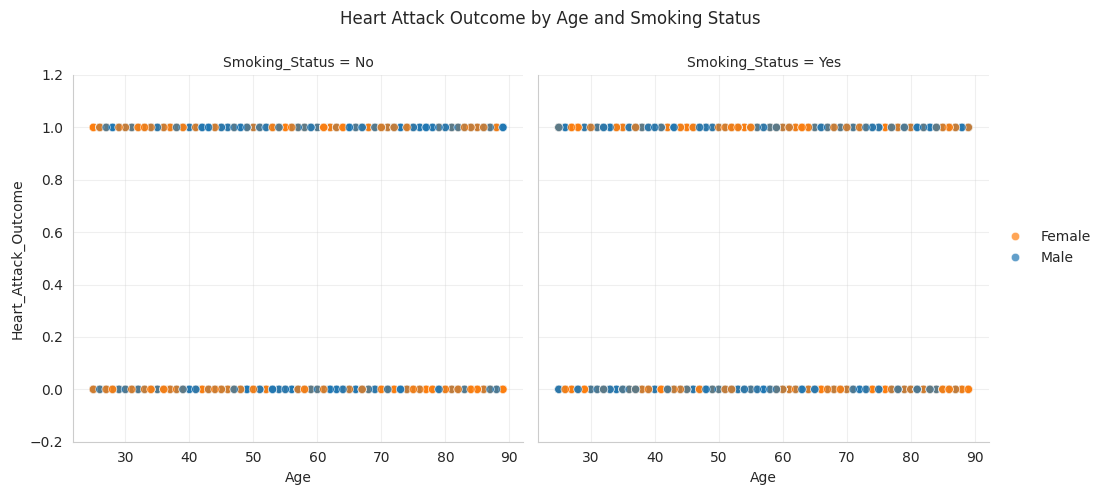

In [19]:
# Using Smoking Status as segment category

g = sns.FacetGrid(df, col="Smoking_Status", height=5)

g.map_dataframe(
    sns.scatterplot,
    x="Age",
    y="Heart_Attack_Outcome",
    hue="Gender",
    alpha=0.7
)

g.add_legend()

for ax in g.axes.flatten():
    ax.set_ylim(-0.2, 1.2)
    ax.grid(alpha=0.3)

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Heart Attack Outcome by Age and Smoking Status")

plt.show()

Advanced Bar Chart with Error Bars + Data Labels

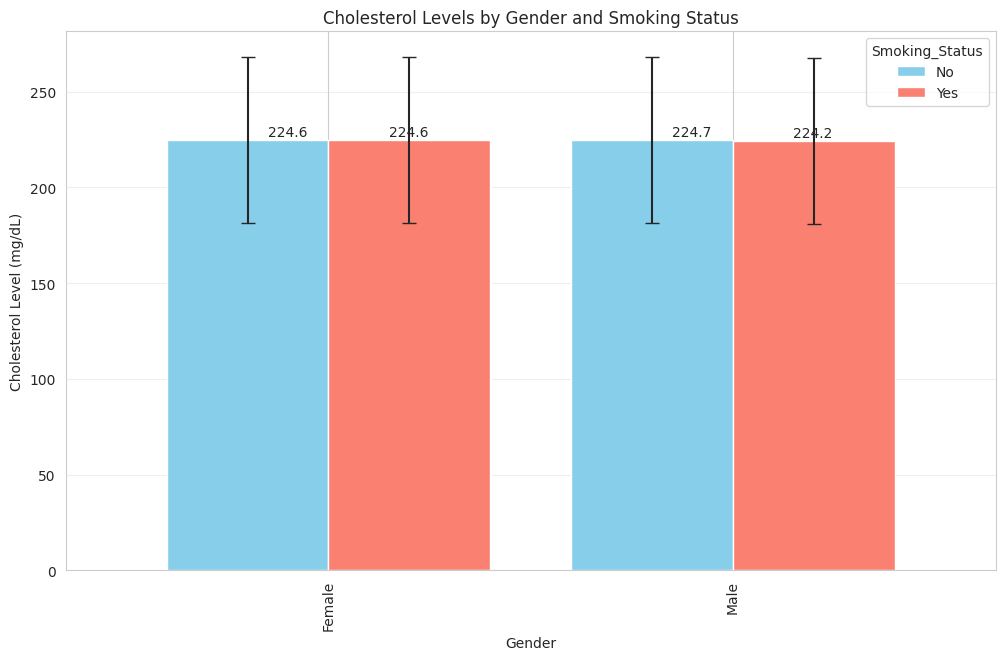

In [20]:
# plt.figure(figsize=(12, 7))

grouped = df.groupby(["Gender", "Smoking_Status"])["Cholesterol_Level"]
means = grouped.mean()
errors = grouped.std()  # standard deviation as error bars

means.unstack().plot(
    kind="bar",
    yerr=errors.unstack(),
    capsize=5,
    figsize=(12, 7),
    color=["skyblue", "salmon"],
    width=0.8
)

plt.title("Cholesterol Levels by Gender and Smoking Status")
plt.xlabel("Gender")
plt.ylabel("Cholesterol Level (mg/dL)")
plt.grid(axis='y', alpha=0.3)

# Add data labels
for idx, val in enumerate(means):
    plt.text(
        idx // 2 - 0.15 + (idx % 2) * 0.3,
        val + 2,
        f"{val:.1f}",
        fontsize=10
    )

plt.show()

Assignment 2

In [21]:
pip install pandas numpy scikit-learn plotly dash jupyter-dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.3 MB/s eta 0:00:00


In [26]:

# Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import plotly.graph_objs as go
import plotly.express as px

from jupyter_dash import JupyterDash   # if using notebook
from dash import dcc, html, Output, Input, State, callback_context, dash_table
import dash
import io
import base64

In [34]:
# 1. Load & prepare data
df = pd.read_csv("/content/drive/MyDrive/heart_attack_south_africa.csv")

df.head()

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,1,76,Female,156,94,79,No,High,Sedentary,35.2,No,No,Good,High,No,No,264,141,65,0
1,2,39,Female,160,185,88,No,Low,Sedentary,21.3,No,No,Average,Medium,No,Yes,150,81,42,0
2,3,85,Male,254,173,113,Yes,Moderate,Highly Active,32.0,Yes,No,Good,Low,No,No,220,124,70,1
3,4,45,Female,261,187,65,No,High,Sedentary,36.4,No,Yes,Average,Low,No,Yes,141,56,38,1
4,5,48,Male,206,189,84,No,Low,Active,26.6,No,No,Good,High,No,No,221,186,26,0


In [40]:
# Quick column normalization: ensure consistent names (adjust if your CSV uses different names)
# Expected columns used below: Age, Cholesterol_Level, Blood_Pressure_Systolic,
# Heart_Attack_Outcome, Gender, Diabetes_Status, Obesity_Index, Patient_ID (optional), Smoking_Status
# If Patient_ID not present, create one.
if "Patient_ID" not in df.columns:
    df["Patient_ID"] = df.index.astype(str)

In [39]:
# Basic cleaning: drop rows missing key columns used in visuals/modeling
required_cols = ["Age", "Cholesterol_Level", "Blood_Pressure_Systolic", "Heart_Attack_Outcome",
                 "Gender", "Diabetes_Status", "Obesity_Index", "Patient_ID"]
present_req = [c for c in required_cols if c in df.columns]
df = df.dropna(subset=present_req[:4])  # at least keep numerical core

In [38]:
# Fill minor missing values for optional features
optional_cols = ["Gender", "Diabetes_Status", "Obesity_Index", "Smoking_Status"]
for c in optional_cols:
    if c in df.columns:
        df[c] = df[c].fillna("Unknown" if df[c].dtype == object else df[c].mean())

In [37]:
# Ensure Heart_Attack_Outcome is numeric {0,1}
df["Heart_Attack_Outcome"] = df["Heart_Attack_Outcome"].astype(int)

In [36]:
# 2. Logistic Regression Model (Age + Cholesterol)
# Prepare features
X = df[["Age", "Cholesterol_Level"]].dropna()
y = df.loc[X.index, "Heart_Attack_Outcome"]

In [41]:

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# scale features for the model
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_s, y_train)

LogisticRegression(max_iter=1000)

In [42]:

# Helper: make 3D scatter (Plotly)
def make_3d_scatter(dataframe, size_scale=4):
    # Color by outcome
    color_map = {0: "blue", 1: "red"}
    colors = dataframe["Heart_Attack_Outcome"].map(color_map)

    hover_text = (
        "Patient ID: " + dataframe["Patient_ID"].astype(str)
        + "<br>Gender: " + dataframe.get("Gender", pd.Series(["Unknown"]*len(dataframe))).astype(str)
        + "<br>Diabetes: " + dataframe.get("Diabetes_Status", pd.Series(["Unknown"]*len(dataframe))).astype(str)
        + "<br>Obesity: " + dataframe.get("Obesity_Index", pd.Series([-1]*len(dataframe))).astype(str)
        + "<br>Outcome: " + dataframe["Heart_Attack_Outcome"].astype(str)
    )

    fig = go.Figure(data=[
        go.Scatter3d(
            x=dataframe["Age"],
            y=dataframe["Cholesterol_Level"],
            z=dataframe["Blood_Pressure_Systolic"],
            mode="markers",
            marker=dict(color=dataframe["Heart_Attack_Outcome"], colorscale=[[0, 'blue'], [1, 'red']],
                        showscale=True, colorbar=dict(title="Outcome (0/1)"),
                        size=4 + dataframe.get("Obesity_Index", 0) / max(1, dataframe.get("Obesity_Index", 1).max())),
            text=hover_text,
            hoverinfo="text"
        )
    ])

    fig.update_layout(scene=dict(
        xaxis_title="Age",
        yaxis_title="Cholesterol_Level (mg/dL)",
        zaxis_title="Blood_Pressure_Systolic (mmHg)"
    ), margin=dict(l=0, r=0, b=0, t=30), title="3D Scatter: Age vs Cholesterol vs Systolic BP (colored by Heart Attack Outcome)")
    return fig

In [43]:

# Helper: build risk surface from logistic model
def make_risk_surface(model, scaler, df, age_steps=50, chol_steps=50):
    age_min, age_max = int(max(0, df["Age"].min() - 1)), int(df["Age"].max() + 1)
    chol_min, chol_max = float(df["Cholesterol_Level"].min()), float(df["Cholesterol_Level"].max())

    age_grid = np.linspace(age_min, age_max, age_steps)
    chol_grid = np.linspace(chol_min, chol_max, chol_steps)
    A, C = np.meshgrid(age_grid, chol_grid)

    # flatten and scale for prediction
    grid_points = np.vstack([A.ravel(), C.ravel()]).T
    grid_points_s = scaler.transform(grid_points)
    probs = model.predict_proba(grid_points_s)[:, 1]  # probability of class 1

    Z = probs.reshape(A.shape)

    surface = go.Surface(x=A, y=C, z=Z, colorscale="RdYlBu", cmin=0, cmax=1, showscale=True)
    layout = go.Layout(
        title="Predicted Heart Attack Risk Surface (Logistic Regression)",
        scene=dict(xaxis_title="Age", yaxis_title="Cholesterol_Level", zaxis_title="Predicted Risk Probability"),
        margin=dict(l=0, r=0, b=0, t=40)
    )
    fig = go.Figure(data=[surface], layout=layout)
    return fig

In [44]:

# Helper: clustering + 3D plot
def cluster_and_make_scatter(dataframe, n_clusters=3):
    cols = ["Age", "Cholesterol_Level", "Blood_Pressure_Systolic", "Obesity_Index"]
    # ensure columns exist
    valid_cols = [c for c in cols if c in dataframe.columns]
    sub = dataframe[valid_cols].dropna()
    if sub.shape[0] < n_clusters:
        # not enough rows, fallback
        return make_3d_scatter(dataframe)

    scaler_c = StandardScaler()
    Xc = scaler_c.fit_transform(sub)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(Xc)

    # Attach labels back (align by index)
    sub = sub.copy()
    sub["cluster"] = labels
    # build hover details for same rows
    idxs = sub.index
    hover_text = (
        "Patient ID: " + dataframe.loc[idxs, "Patient_ID"].astype(str)
        + "<br>Age: " + dataframe.loc[idxs, "Age"].astype(str)
        + "<br>Cholesterol: " + dataframe.loc[idxs, "Cholesterol_Level"].astype(str)
        + "<br>SystolicBP: " + dataframe.loc[idxs, "Blood_Pressure_Systolic"].astype(str)
    )

    fig = px.scatter_3d(
        sub,
        x="Age",
        y="Cholesterol_Level",
        z="Blood_Pressure_Systolic",
        color=sub["cluster"].astype(str),
        symbol=sub["cluster"].astype(str),
        hover_name=dataframe.loc[idxs, "Patient_ID"].astype(str),
        hover_data={"cluster": True},
        title=f"3D Clusters (k={n_clusters})"
    )

    fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
    return fig

In [48]:
# 3. Dash App (JupyterDash) - UI
app = JupyterDash(__name__)
# use Dash(__name__) if running as standalone

In [49]:

# Filter dropdown options for Gender, Diabetes, Smoking if present
gender_options = [{"label": str(g), "value": g} for g in sorted(df["Gender"].unique())] if "Gender" in df.columns else []
diabetes_options = [{"label": str(g), "value": g} for g in sorted(df["Diabetes_Status"].unique())] if "Diabetes_Status" in df.columns else []
smoke_options = [{"label": str(g), "value": g} for g in sorted(df["Smoking_Status"].unique())] if "Smoking_Status" in df.columns else []

app.layout = html.Div([
    html.H2("Heart Attack Risk Dashboard — Interactive Visualizations"),
    html.Div([
        html.Label("Filter: Gender"),
        dcc.Dropdown(id="filter-gender", options=gender_options, multi=True, placeholder="All genders"),
        html.Label("Filter: Diabetes Status"),
        dcc.Dropdown(id="filter-diabetes", options=diabetes_options, multi=True, placeholder="All statuses"),
        html.Label("Filter: Smoking Status"),
        dcc.Dropdown(id="filter-smoking", options=smoke_options, multi=True, placeholder="All"),
        html.Label("Cluster Count"),
        dcc.Slider(id="cluster-slider", min=2, max=8, step=1, value=3,
                   marks={i: str(i) for i in range(2, 9)}),
        html.Br(),
        html.Button("Download Filtered CSV", id="download-btn"),
        dcc.Download(id="download-dataframe-csv")
    ], style={"width": "24%", "display": "inline-block", "verticalAlign": "top", "padding": "10px"}),

    html.Div([
        dcc.Tabs([
            dcc.Tab(label="3D Scatter", children=[
                dcc.Graph(id="3d-scatter-graph", figure=make_3d_scatter(df))
            ]),
            dcc.Tab(label="Risk Surface (LR)", children=[
                dcc.Graph(id="risk-surface", figure=make_risk_surface(clf, scaler, df))
            ]),
            dcc.Tab(label="Clustering (3D)", children=[
                dcc.Graph(id="cluster-3d", figure=cluster_and_make_scatter(df, n_clusters=3))
            ]),
            dcc.Tab(label="Outcome Distribution (Bar)", children=[
                dcc.Graph(id="outcome-bar"),
                html.Div(id="outcome-summary")
            ])
        ])
    ], style={"width": "74%", "display": "inline-block", "padding": "10px", "verticalAlign": "top"})
])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [52]:
# 4) Callbacks: update visuals based on filters & cluster slider
# -------------------------
@app.callback(
    Output("3d-scatter-graph", "figure"),
    Output("risk-surface", "figure"),
    Output("cluster-3d", "figure"),
    Output("outcome-bar", "figure"),
    Output("outcome-summary", "children"),
    Input("filter-gender", "value"),
    Input("filter-diabetes", "value"),
    Input("filter-smoking", "value"),
    Input("cluster-slider", "value")
)
def update_visuals(selected_gender, selected_diabetes, selected_smoke, n_clusters):
    dff = df.copy()
    # apply filters
    if selected_gender:
        dff = dff[dff["Gender"].isin(selected_gender)]
    if selected_diabetes:
        dff = dff[dff["Diabetes_Status"].isin(selected_diabetes)]
    if selected_smoke and "Smoking_Status" in dff.columns:
        dff = dff[dff["Smoking_Status"].isin(selected_smoke)]

    # 3D scatter
    fig_scatter = make_3d_scatter(dff)

    # risk surface: we keep model trained globally; but surface should reflect model predictions based on entire dataset ranges
    fig_surface = make_risk_surface(clf, scaler, dff)

    # clustering
    fig_cluster = cluster_and_make_scatter(dff, n_clusters=n_clusters)

    # Bar chart: distribution of Heart_Attack_Outcome
    outcome_counts = dff["Heart_Attack_Outcome"].value_counts().sort_index()
    bar_fig = go.Figure(data=[
        go.Bar(x=outcome_counts.index.astype(str), y=outcome_counts.values, marker_color=["blue", "red"])
    ])
    bar_fig.update_layout(title="Filtered Heart Attack Outcome Distribution (Bar Chart)",
                          xaxis_title="Heart Attack Outcome (0 = No, 1 = Yes)",
                          yaxis_title="Count")

    summary = f"Filtered dataset size: {len(dff)} rows. Outcome counts: {outcome_counts.to_dict()}"

    return fig_scatter, fig_surface, fig_cluster, bar_fig, summary

# CSV download callback
@app.callback(
    Output("download-dataframe-csv", "data"),
    Input("download-btn", "n_clicks"),
    State("filter-gender", "value"),
    State("filter-diabetes", "value"),
    State("filter-smoking", "value"),
    prevent_initial_call=True
)
def download_filtered(n_clicks, selected_gender, selected_diabetes, selected_smoke):
    dff = df.copy()
    if selected_gender:
        dff = dff[dff["Gender"].isin(selected_gender)]
    if selected_diabetes:
        dff = dff[dff["Diabetes_Status"].isin(selected_diabetes)]
    if selected_smoke and "Smoking_Status" in dff.columns:
        dff = dff[dff["Smoking_Status"].isin(selected_smoke)]

    return dcc.send_data_frame(dff.to_csv, "filtered_heart_attack_data.csv", index=False)

In [55]:
# Run the app
# If running in a notebook:
app.run(debug=True, port=8051, jupyter_mode="inline")

# If you prefer to run as a standalone Dash app, replace the last line with:
# app = dash.Dash(__name__)
# (use the same layout & callbacks definitions)
# if __name__ == "__main__":
#     app.run_server(debug=True, port=8051)

Dash is running on http://127.0.0.1:8051/



INFO:dash.dash:Dash is running on http://127.0.0.1:8051/



 * Serving Flask app '__main__'
 * Debug mode: on
